In [2]:
# import questions.csv
import pandas as pd


questions = pd.read_csv('../data/questions.csv')
questions.head(5)

,question,qnum,person,wikidataperson,text,date
0,https://id.parliament.uk/0IwOO533,903422,https://id.parliament.uk/Vs3bGLNz,http://www.wikidata.org/entity/Q689287,Which three departments had the lowest proport...,2023-01-05+00:00
1,https://id.parliament.uk/dRJ9254g,117748,https://id.parliament.uk/eD0yd5Ec,http://www.wikidata.org/entity/Q19871931,"To ask the Secretary of State for Foreign, Com...",2023-01-06+00:00
2,https://id.parliament.uk/e4IDRkKi,117410,https://id.parliament.uk/RlIqlixq,http://www.wikidata.org/entity/Q695228,"To ask the Secretary of State for Foreign, Com...",2023-01-06+00:00
3,https://id.parliament.uk/rXZ0r1JW,117477,https://id.parliament.uk/1DzMUkBy,http://www.wikidata.org/entity/Q337812,"To ask the Secretary of State for Foreign, Com...",2023-01-06+00:00
4,https://id.parliament.uk/SmC4cGhg,117777,https://id.parliament.uk/tOfis7j9,http://www.wikidata.org/entity/Q27942399,To ask the Secretary of State for Health and S...,2023-01-06+00:00


In [3]:
import geopandas as gpd
en = gpd.read_file("../shape/english_region_region.shp")


sct_wls = gpd.read_file("../shape/scotland_and_wales_region.shp")


ni = gpd.read_file("../shape/OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.shp")

ni.rename(columns={"CountyName": "NAME"}, inplace=True)
ni["NAME"] = ni["NAME"].str.lower()
ni["NAME"] = ni["NAME"].str.capitalize()

In [4]:
# scotland and wales split unnecessarily into many polygons for the same region
# as such, I have merged them into one polygon per region
sct_wls = sct_wls.dissolve(by="NAME", aggfunc="sum")
sct_wls = sct_wls.reset_index()
sct_wls.head(2)

,NAME,geometry,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1
0,Central Scotland PER,"POLYGON ((273712.622 645542.835, 273719.020 64...",SPE,Scottish Parliament Electoral Region,CENTRAL_SCOTLAND_PER,1481,1481,124639,41546,S17000019,95483.869,1779.513,VA,CIVIL VOTING AREA,0,0
1,Glasgow PER,"POLYGON ((258096.702 672970.504, 258136.798 67...",SPE,Scottish Parliament Electoral Region,GLASGOW_PER,1482,1482,126812,41543,S17000020,20946.624,185.985,VA,CIVIL VOTING AREA,0,0
2,Highlands and Islands PER,"MULTIPOLYGON (((55661.497 780686.500, 55667.49...",SPESPESPESPESPESPESPESPESPESPESPESPESPESPESPES...,Scottish Parliament Electoral RegionScottish P...,HIGHLANDS_AND_ISLANDS_PERHIGHLANDS_AND_ISLANDS...,3544407,3544407,354159521,110426610,S17000011S17000011S17000011S17000011S17000011S...,4125655.196,91527.212,VAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVAVA...,CIVIL VOTING AREACIVIL VOTING AREACIVIL VOTING...,0,0
3,Lothian PER,"MULTIPOLYGON (((302334.395 655991.635, 302261....",SPE,Scottish Parliament Electoral Region,LOTHIAN_PER,1845,1845,127109,41548,S17000012,87283.885,1380.037,VA,CIVIL VOTING AREA,0,0
4,Mid Scotland and Fife PER,"MULTIPOLYGON (((329246.501 683248.502, 329259....",SPE,Scottish Parliament Electoral Region,MID_SCOTLAND_AND_FIFE_PER,1844,1844,124448,41547,S17000013,921251.932,9183.679,VA,CIVIL VOTING AREA,0,0
5,Mid and West Wales PER,"MULTIPOLYGON (((173935.497 205587.601, 173950....",WPE,Welsh Parliament Electoral Region,MID_AND_WEST_WALES_PER,1840,1840,125400,41534,W10000006,1327687.465,16492.446,VA,CIVIL VOTING AREA,0,0
6,North East Scotland PER,"MULTIPOLYGON (((349502.340 868854.560, 349490....",SPE,Scottish Parliament Electoral Region,NORTH_EAST_SCOTLAND_PER,1842,1842,126822,41542,S17000014,901018.611,6177.947,VA,CIVIL VOTING AREA,0,0
7,North Wales PER,"MULTIPOLYGON (((310816.300 385718.100, 310835....",WPE,Welsh Parliament Electoral Region,NORTH_WALES_PER,1841,1841,129136,41535,W10000001,417239.114,13517.146,VA,CIVIL VOTING AREA,0,0
8,South Scotland PER,"MULTIPOLYGON (((266029.102 543547.701, 266029....",SPE,Scottish Parliament Electoral Region,SOUTH_SCOTLAND_PER,1843,1843,127122,41544,S17000015,1638266.161,27126.801,VA,CIVIL VOTING AREA,0,0
9,South Wales Central PER,"MULTIPOLYGON (((322144.197 165168.900, 322164....",WPE,Welsh Parliament Electoral Region,SOUTH_WALES_CENTRAL_PER,1838,1838,122463,41532,W10000007,87667.662,1568.413,VA,CIVIL VOTING AREA,0,0


In [ ]:
len(sct_wls)

In [5]:
# convert the shapefiles of northern ireland to BNG
print(en.crs)
print(ni.crs)

ni = ni.to_crs(en.crs)

EPSG:27700
EPSG:29902


In [7]:
UK = pd.concat([en[["NAME", "geometry"]], sct_wls[["NAME", "geometry"]]], ignore_index=True)
UK = pd.concat([UK, ni[["NAME", "geometry"]]], ignore_index=True)
               
UK = gpd.GeoDataFrame(UK)
UK.set_geometry("geometry", inplace=True)
UK

,NAME,geometry
0,East Midlands English Region,"POLYGON ((413673.997 400018.995, 413676.198 39..."
1,London English Region,"POLYGON ((531024.595 200933.623, 531026.320 20..."
2,North West English Region,"POLYGON ((374209.550 348536.660, 374212.450 34..."
3,West Midlands English Region,"POLYGON ((360408.943 340399.192, 360410.895 34..."
4,Yorkshire and the Humber English Region,"POLYGON ((424875.080 379990.440, 424872.170 37..."
5,South East English Region,"MULTIPOLYGON (((490173.603 256107.999, 490234...."
6,North East English Region,"MULTIPOLYGON (((398217.260 657393.560, 398226...."
7,Eastern English Region,"MULTIPOLYGON (((647445.460 323359.390, 647443...."
8,South West English Region,"MULTIPOLYGON (((418659.802 242642.204, 418662...."
9,Central Scotland PER,"POLYGON ((273712.622 645542.835, 273719.020 64..."


In [8]:
"""
SPARQL query to wikidata endpoint to get all MPs and their constituencies locations

"""
# Help setting this up from https://rebeccabilbro.github.io/sparql-from-python/


from SPARQLWrapper import SPARQLWrapper, JSON

const_df = pd.DataFrame()
sparql  = SPARQLWrapper("https://query.wikidata.org/sparql")
sparql.setQuery("""
SELECT ?person ?const ?personLabel ?constLabel ?location
WHERE
{
  ?person p:P39 ?position.
  ?position ps:P39 wd:Q77685926.
  ?position pq:P768 ?const.
  ?const wdt:P625 ?location 
  SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
""")

sparql.setReturnFormat(JSON)
result = sparql.query().convert()
# results -> bindings returns a list of dictionaries
result = result["results"]["bindings"]

# removed type from the results
for item in result:
    for key in item:
        item[key] = item[key]["value"]
const_df = pd.DataFrame(result)
const_df.head(3)

,const,person,location,personLabel,constLabel
0,http://www.wikidata.org/entity/Q586663,http://www.wikidata.org/entity/Q75838898,Point(-2.96528 56.3158),Wendy Chamberlain,North East Fife
1,http://www.wikidata.org/entity/Q650377,http://www.wikidata.org/entity/Q30234248,Point(-1.32 50.684),Bob Seely,Isle of Wight
2,http://www.wikidata.org/entity/Q750810,http://www.wikidata.org/entity/Q263166,Point(-2.772 53.903),Ben Wallace,Wyre and Preston North


In [9]:
const_df = const_df.drop_duplicates()
const_df = const_df.astype({"constLabel": "object", "personLabel": "object"})

In [10]:
# get the BNG location of each constituency
from bng_latlon import WGS84toOSGB36
const_df["easting"] = None
const_df["northing"] = None
for index, row in const_df.iterrows():
    lon, lat = row["location"].replace("Point(", "").replace(")", "").split(" ")

    lat = float(lat)
    lon = float(lon)

    x, y = WGS84toOSGB36(lat, lon)

    const_df.at[index, "easting"] = x
    const_df.at[index, "northing"] = y
const_df = const_df.drop(columns=["location"])

In [11]:
import shapely
import numpy as np

# checks which larger region each MPs constituency is in

# help from https://stackoverflow.com/questions/7861196/check-if-a-geopoint-with-latitude-and-longitude-is-within-a-shapefile



for index, row in const_df.iterrows():


    point = shapely.geometry.Point(row["easting"], row["northing"])
    point_contained = False

    for _, row2 in UK.iterrows():
        if row2["geometry"].contains(point):
            const_df.at[index, "region"] = row2["NAME"]
            point_contained = True
            break

    # some of the wikidata coordinates are in water
    # find the closest region to the point  
    if not point_contained:

        # help from https://stackoverflow.com/questions/36972537/distance-from-point-to-polygon-when-inside
        shortest_dist = np.inf
        point = shapely.geometry.Point(row["easting"], row["northing"])

        for _, row2 in UK.iterrows():
            dist = row2["geometry"].boundary.distance(point)

            if dist < shortest_dist:
                shortest_dist = dist
                closest_const = row2["NAME"]
        const_df.at[index, "region"] = closest_const

In [12]:
# iterate through each question, link it to the MP who asked it, and the region they are from
questions["region"] = None
for index, row in questions.iterrows():
    # find the row in const_df with the same name as the MP who asked the question

    row2 = const_df[const_df["person"] == row["wikidataperson"]]

    region = row2["region"].values[0]
    # set the region of the question to that region
    questions.at[index, "region"] = region

In [13]:
questions["region"].value_counts()

region
London English Region                      5736
Yorkshire and the Humber English Region    4672
North West English Region                  3296
South East English Region                  2604
West Midlands English Region               2137
North East English Region                  1798
South West English Region                  1476
East Midlands English Region               1017
Eastern English Region                      570
Glasgow PER                                 557
Down                                        531
South Wales West PER                        355
South Wales East PER                        279
Mid and West Wales PER                      273
South Scotland PER                          258
Central Scotland PER                        243
Highlands and Islands PER                   187
Londonderry                                 160
West Scotland PER                           159
South Wales Central PER                     137
Lothian PER                      

In [14]:
# go through each region and combine all the questions asked by MPs from that region into one string
corpus = {}
for region in questions["region"].unique():
    combined_text = ""
    for index, row in questions[questions["region"] == region].iterrows():
        combined_text += row["text"] + " "
    
    corpus[region] = combined_text


In [15]:
for key in corpus:
    print(key)

East Midlands English Region
London English Region
South East English Region
Yorkshire and the Humber English Region
North West English Region
West Midlands English Region
South Wales West PER
Mid and West Wales PER
North East English Region
West Scotland PER
South Wales East PER
Glasgow PER
South West English Region
Eastern English Region
North Wales PER
South Scotland PER
Londonderry
Antrim
Highlands and Islands PER
Central Scotland PER
Lothian PER
North East Scotland PER
South Wales Central PER
Down
Mid Scotland and Fife PER


In [16]:
"""Code adapted from here http://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html"""

import re
from nltk.stem.porter import PorterStemmer
from stop_words import get_stop_words
from nltk.tokenize import RegexpTokenizer

def text_to_tokens(doc):
    p_stemmer = PorterStemmer()
    tokenizer = RegexpTokenizer(r'\w+')

    doc = doc.lower()

    # remove any letter that is of the form (a), (b) etc
    doc = re.sub(r'\(\w\)', '', doc)
    
    # convert to tokens
    tokens = tokenizer.tokenize(doc) 
    
    # remove stop words from tokens
    en_stop = get_stop_words('en')
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # remove additional words that are not in the stop words list
    additional_stop_words = ["(a)","secretary", "state", "ask", "asking", "department", "departments", "minister", "ministers", "government", "s", "i", "ii"]
    stopped_tokens = [i for i in stopped_tokens if not i in additional_stop_words]

    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    return stemmed_tokens

In [19]:
 
doc_set = []

# put documents into a list in order of the keys in the corpus dictionary
for key in corpus.keys():
    doc_set = doc_set + [corpus[key]]


texts = []

# turn each document into a list of tokens
for doc in doc_set:
    
    # add tokens to list
    texts.append(text_to_tokens(doc))

In [20]:
print(doc_set[0])

Which three departments had the lowest proportion of staff attending the office in January 2023. To ask the Secretary of State for Education, what steps her Department is taking to help support sixth-form colleges with rises in the cost of energy. To ask the Secretary of State for Health and Social Care, whether he has a timetable for the introduction of legislative proposals to give care home residents a legal right to receive visitors. To ask the Secretary of State for Education, what steps her Department is taking to help support sixth-form colleges with costs associated with increases in the level of inflation. To ask the Secretary of State for Education, how many further education college infrastructure projects are affected by the reclassification of colleges. To ask the Secretary of State for Environment, Food and Rural Affairs, whether she has plans to phase out the caging of laying hens by 2027. To ask the Secretary of State for Work and Pensions, how many people have accessed

In [21]:
from gensim import corpora

# create dictionary which contains the number of times a word appears and other statistics
dictionary = corpora.Dictionary(texts)


# makes a list for each document with vectors of (token_id, token_count)
bow_vectors = [dictionary.doc2bow(text) for text in texts]

In [22]:
import gensim

# Adapted from https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
def compute_coherence(bow_vectors, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=bow_vectors,
                                           id2word=dictionary,
                                             num_topics=k,
                                             chunksize=100,
                                             passes=10,
                                            alpha=a,
                                            eta=b,
                                            random_state=42
                                           )
    coherencne_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherencne_model_lda.get_coherence()



In [23]:
# Adapted grid search from https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

# grid search for the best number of topics, alpha and beta values
import os
import numpy as np
import tqdm


# if the hyper parameters have already been stored, load them
if os.path.exists("../data/hyper_params.csv"):
    model_results = pd.read_csv("../data/hyper_params.csv")
    model_results = model_results.drop(columns=["Unnamed: 0"])

else:
    topics_range = list(range(2, 10, 1))

    alpha = list(np.arange(0.01, 1, 0.3))
    alpha.append("symmetric")
    alpha.append("asymmetric")

    beta = list(np.arange(0.01, 1, 0.3))
    beta.append("symmetric")

    model_results = {
                    'Topics': [],
                    'Alpha': [],
                    'Beta': [],
                    'Coherence': []
                    }


    pbar = tqdm.tqdm(total=(len(beta)*len(alpha) * len(topics_range)))

    for i, k in enumerate(topics_range):

        for a in alpha:
            for b in beta:
                
                coherence = compute_coherence(bow_vectors, dictionary, k, a, b)

                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(coherence)
                pbar.update(1)
            




In [24]:
hyper_params = pd.DataFrame(model_results)
hyper_params = hyper_params.sort_values(by=['Coherence'], ascending=False)
hyper_params.to_csv("../data/hyper_params.csv")
hyper_params

,Topics,Alpha,Beta,Coherence
0,8,asymmetric,0.01,0.310015
2,8,symmetric,0.01,0.310015
3,8,0.01,0.01,0.310015
4,8,0.31,0.01,0.310015
5,8,0.61,0.01,0.310015
...,...,...,...,...
235,2,0.9099999999999999,0.01,0.272966
236,2,0.31,0.01,0.272966
237,2,symmetric,0.01,0.272966
238,2,asymmetric,0.01,0.272966


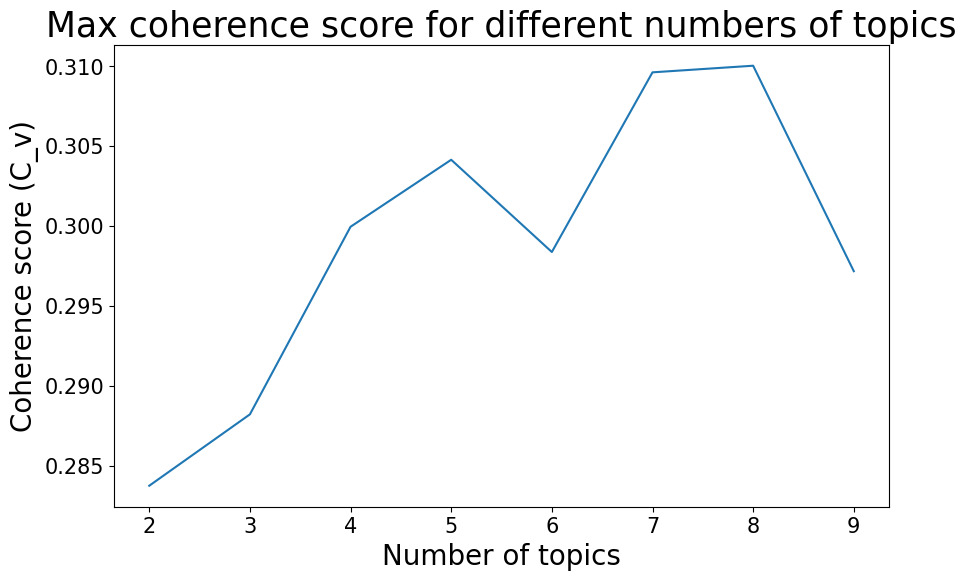

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

max_coherence = hyper_params.groupby("Topics")["Coherence"].max()
max_coherence.plot(x="Topics", y="Coherence", ax=ax)

ax.set_xlabel("Number of topics" , fontsize=20)
ax.set_ylabel("Coherence score (C_v)", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_title("Max coherence score for different numbers of topics", fontsize=25)
plt.savefig("../visualisations/topics_coherence.png", dpi=300)

Text(0.5, 1.0, 'Mean coherence score for different beta values')

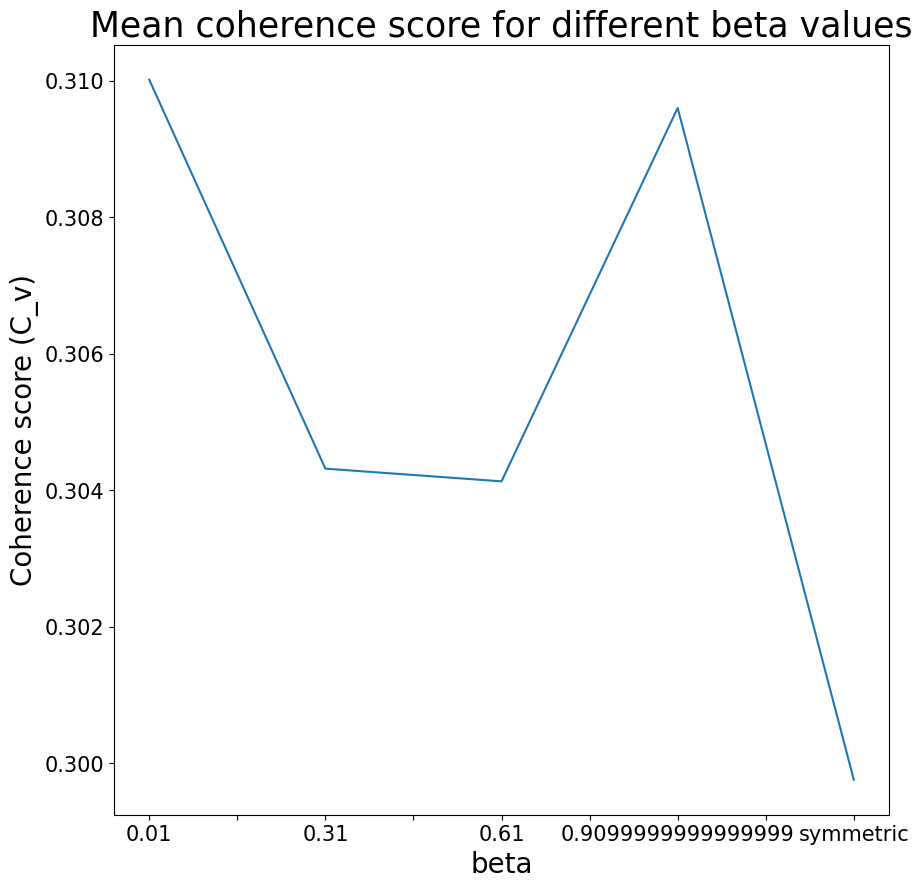

In [443]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

max_coherence = hyper_params.groupby('Beta')['Coherence'].max()
max_coherence.plot(x="Beta", y="Coherence", ax=ax)

ax.set_xlabel("beta" , fontsize=20)
ax.set_ylabel("Coherence score (C_v)", fontsize=20)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_title("Mean coherence score for different beta values", fontsize=25)

In [27]:
def print_topics(model, words=4):
    """Prints the topics of a given LDA model"""
    for topic in model.print_topics(num_words=words):
        print(topic)
        print("\n")

In [70]:
def generate_regional_topics_df(model):
    """Generates a dataframe with the topic probabilities for each region"""
    
    regional_topics = pd.DataFrame(columns=["region", "topic", "topic_prob"])

    # bow vector is ordered the same as the corpus keys
    names = list(corpus.keys())

    for index, vector in enumerate(bow_vectors):


        doc_topics = model.get_document_topics(vector)

        for topic in doc_topics:
            regional_topics = pd.concat(
                [regional_topics, 
                pd.DataFrame({"region": [names[index]], "topic": [topic[0]], "topic_prob": [topic[1]]})], 
                ignore_index=True
                ).sort_values(by=["topic_prob"], ascending=False)
    return regional_topics

In [29]:
def print_coherence(model):
    """Returns the coherence score of a given model"""
    coherence_model = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence="c_v")
    return coherence_model.get_coherence()

In [444]:
# LDA model for the best global hyperparameters
# I have increased the number of passes to 200 to improve the model
lda_model = gensim.models.LdaMulticore(corpus=bow_vectors,
                                           id2word=dictionary,
                                             num_topics=8,
                                             chunksize=100,
                                             passes=200,
                                            alpha="asymmetric",
                                            eta=0.01,
                                            random_state=42
                                           )

In [446]:
print_coherence(lda_model)

0.373919374707286

In [445]:
print_topics(lda_model)


(0, '0.021*"health" + 0.020*"care" + 0.017*"social" + 0.017*"assess"')


(1, '0.018*"whether" + 0.015*"made" + 0.015*"energi" + 0.014*"assess"')


(2, '0.025*"school" + 0.021*"educ" + 0.012*"2023" + 0.012*"teacher"')


(3, '0.000*"inhal" + 0.000*"infantri" + 0.000*"inspectio" + 0.000*"inhibit"')


(4, '0.016*"will" + 0.015*"health" + 0.015*"assess" + 0.014*"whether"')


(5, '0.014*"health" + 0.012*"whether" + 0.012*"care" + 0.012*"made"')


(6, '0.030*"defenc" + 0.018*"health" + 0.018*"care" + 0.016*"social"')


(7, '0.018*"made" + 0.017*"assess" + 0.013*"step" + 0.012*"take"')




In [448]:
hyper_params[hyper_params["Topics"] == 4].head(10)

,Topics,Alpha,Beta,Coherence
36,4,asymmetric,0.61,0.299940
37,4,0.9099999999999999,0.61,0.299940
38,4,symmetric,0.61,0.299940
39,4,0.31,0.61,0.299940
40,4,0.61,0.61,0.299940
41,4,0.01,0.61,0.299940
42,4,symmetric,0.9099999999999999,0.299867
43,4,0.31,0.9099999999999999,0.299867
44,4,asymmetric,0.9099999999999999,0.299867
45,4,0.01,0.9099999999999999,0.299867


In [34]:

lda_model_2 = gensim.models.LdaMulticore(corpus=bow_vectors,
                                           id2word=dictionary,
                                             num_topics=4,
                                             chunksize=100,
                                             passes=200,
                                            alpha=0.91,
                                            eta=0.91,
                                            random_state=1
                                           )

In [35]:

lda_model_2 = gensim.models.LdaMulticore(corpus=bow_vectors,
                                           id2word=dictionary,
                                             num_topics=3,
                                             chunksize=100,
                                             passes=10,
                                            alpha=0.61,
                                            eta=0.95,
                                            random_state=1
                                           )

In [449]:
# code from the docs of word2vec https://radimrehurek.com/gensim/models/word2vec.html
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

In [45]:
# iterate through the first 100 seeds for fixed hyperparameters
# output the average semantic similarity between the first word of each topic

for seed in range(1,100+1):
    topics = 4
    lda_model = gensim.models.LdaMulticore(corpus=bow_vectors,
                                           id2word=dictionary,
                                             num_topics=topics,
                                             chunksize=100,
                                             passes=10,
                                            alpha=0.95,
                                            eta=0.95,
                                            random_state=seed
                                           )
    
    # calculate the semantic similarity between the topics first word for all pairs of topics
    topic_similarity = []
    for i in range(0,topics):
        for j in range(i+1,topics):
            word_1 = lda_model.show_topic(i)[0][0]
            word_2 = lda_model.show_topic(j)[0][0]

            # words are not necessarily in the vocabulary of the glove vectors
            try:
                topic_similarity.append(glove_vectors.similarity(word_1, word_2))
            except KeyError:
                pass

    topic_similarity = sum(topic_similarity) / len(topic_similarity)

    print(seed, topic_similarity)




1 0.6047721405824026
2 0.8070050179958344
3 0.6750732660293579
4 0.6754723489284515
5 0.6169927616914114
6 0.807342916727066
7 0.5465049048264822
8 0.6125691731770834
9 0.518151193857193
10 0.6618561546007792
11 0.746392086148262
12 0.746392086148262
13 0.6596287488937378
14 0.6618561148643494
15 0.5795531223217646
16 0.7186176627874374
17 0.6790417830149332
18 0.5856881340344747
19 0.5895921736955643
20 0.5465049048264822
21 0.29044392829140026
22 0.5229843457539877
23 0.7341095209121704
24 0.746392086148262
25 0.6030764778455099
26 0.7341095209121704
27 0.6030764778455099
28 0.22348753238717714
29 0.6671833395957947
30 0.7426733573277792
31 0.2647096539537112
32 0.3428600461532672
33 0.518151193857193
34 0.7341095209121704
35 0.807342916727066
36 0.638421356678009
37 0.6169927616914114
38 0.6618561148643494
39 0.6596287488937378
40 0.6527271469434103
41 0.6618561546007792
42 0.6030764778455099
43 0.6030764778455099
44 0.6330699721972147
45 0.6422492216030756
46 0.4616151849428813
47 

In [465]:
# Using seed 70 because of the lowest semantic similarity between topics
lda_model_2 = gensim.models.LdaMulticore(corpus=bow_vectors,
                                        id2word=dictionary,
                                            num_topics=4,
                                            chunksize=100,
                                            passes=200,
                                        alpha=0.95,
                                        eta=0.95,
                                        random_state=70
                                        )
lda_model_2.save("../models/lda_chosen_model")

In [321]:
print_topics(lda_model_2)

(0, '0.002*"steel" + 0.001*"merseysid" + 0.001*"sefton" + 0.001*"wirral"')


(1, '0.014*"health" + 0.013*"made" + 0.013*"care" + 0.013*"assess"')


(2, '0.023*"school" + 0.014*"teacher" + 0.012*"educ" + 0.011*"scienc"')


(3, '0.056*"defenc" + 0.012*"accommod" + 0.011*"unit" + 0.011*"barrack"')




In [90]:
regional_topics = generate_regional_topics_df(lda_model_2)
regional_topics["topic"].value_counts()

C:\Users\Test\AppData\Local\Temp\ipykernel_21392\1166411820.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regional_topics = pd.concat(


topic
1    25
3     3
2     1
0     1
Name: count, dtype: int64

In [182]:
# visualise the topics in an interactive graph

import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
graphs = pyLDAvis.gensim.prepare(lda_model_2, bow_vectors, dictionary)
pyLDAvis.save_html(graphs, "../visualisations/lda_graphs.html")

In [455]:
# merge the regional topics with the constituencies geometry
regional_topics_geo = pd.merge(regional_topics, UK, left_on="region", right_on="NAME", how="right")
regional_topics_geo.drop(columns=["NAME"], inplace=True)
regional_topics_geo = gpd.GeoDataFrame(regional_topics_geo)
regional_topics_geo.set_geometry("geometry", inplace=True)


In [457]:
regional_topics_geo[regional_topics_geo.isna().any(axis=1)]

,region,topic,topic_prob,geometry
27,NaN,NaN,NaN,"POLYGON ((55500.622 574089.322, 55504.907 5740..."
29,NaN,NaN,NaN,"POLYGON ((118271.505 521389.227, 118403.026 52..."
30,NaN,NaN,NaN,"POLYGON ((32470.601 538239.996, 32486.815 5382..."


In [154]:
topic_dict = {0: "Industry and Regional Development", 1: "Health Care", 2: "Education and Teaching", 3: "Defense and Millitary Infrastructure"}

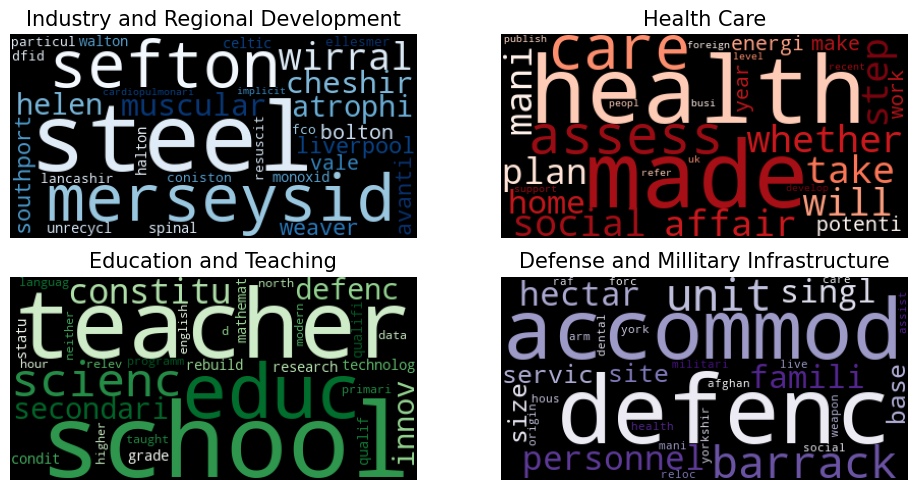

In [247]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# plot the word clouds for each topic
topics = [0, 1, 2, 3]
colormaps = ["Blues", "Reds", "Greens", "Purples"]
 
 
for topic in topics:

    # take top 30 words from each topic
    text = [x[0] for x in lda_model_2.show_topic(topicid=topic, topn=30)]
    text = " ".join(text)

    wordcloud = WordCloud(colormap=colormaps[topic]).generate(text)

    ax = axs[topic // 2, topic % 2]
    
    ax.imshow(wordcloud)
    ax.set_title(topic_dict[topic], fontsize=15)
    ax.axis("off")


plt.savefig("../visualisations/wordclouds.png", dpi=300)
plt.tight_layout()
plt.show()


In [277]:
def regional_topic_map(regional_topics_geo, topic, cmap="Blues"):
    """Plots a map of the probability of a topic in each region"""
    _, ax = plt.subplots(figsize=(10, 10))

    UK.plot(ax=ax, color="white", edgecolor="black", linewidth=0.5)

    regional_topics_geo[regional_topics_geo["topic"] == topic].plot(
        ax=ax, column="topic_prob", cmap=cmap, edgecolor="black", 
        linewidth=0.5, legend=True, vmin=0, vmax=1,
        legend_kwds={'label': "Probability of topic", 'shrink': 0.8})
    
    ax.set_title(topic_dict[topic], fontsize=20, x=0.6, y=0.97 )
    ax.set_axis_off()
    plt.savefig(f"../visualisations/topic_{topic}.png", dpi=300, bbox_inches='tight')

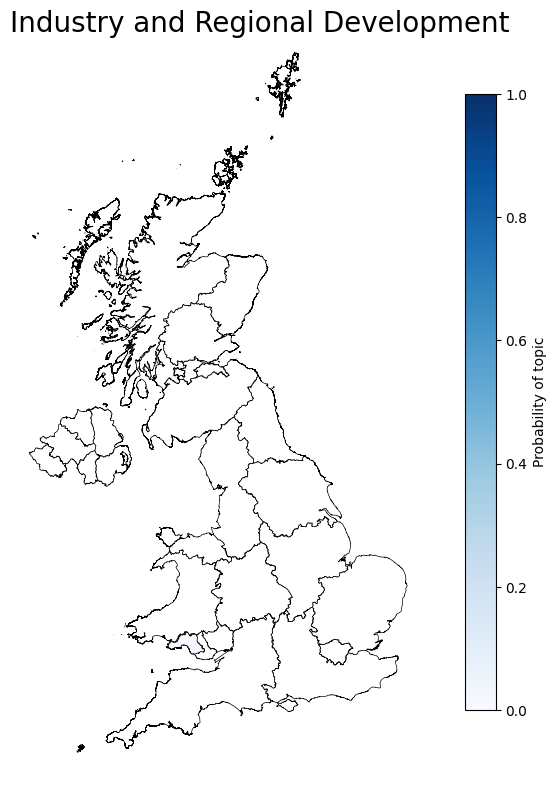

In [278]:
regional_topic_map(regional_topics_geo, 0, cmap="Blues")

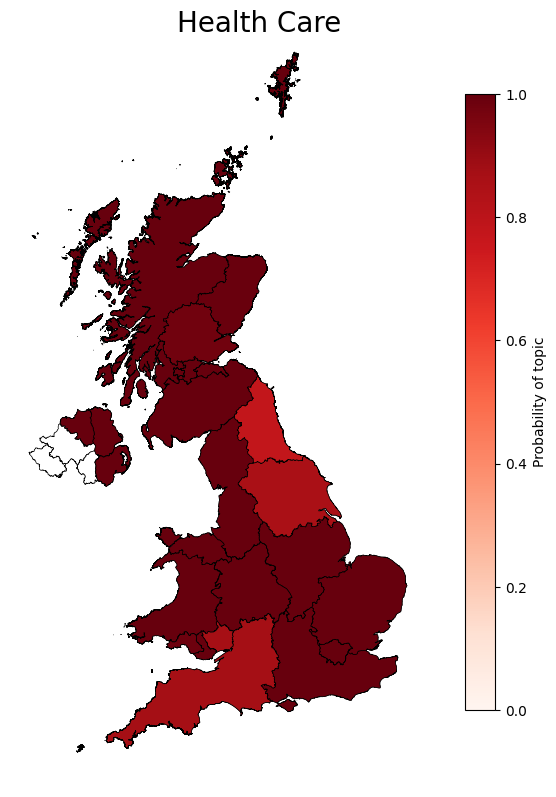

In [274]:
regional_topic_map(regional_topics_geo, 1, "Reds")

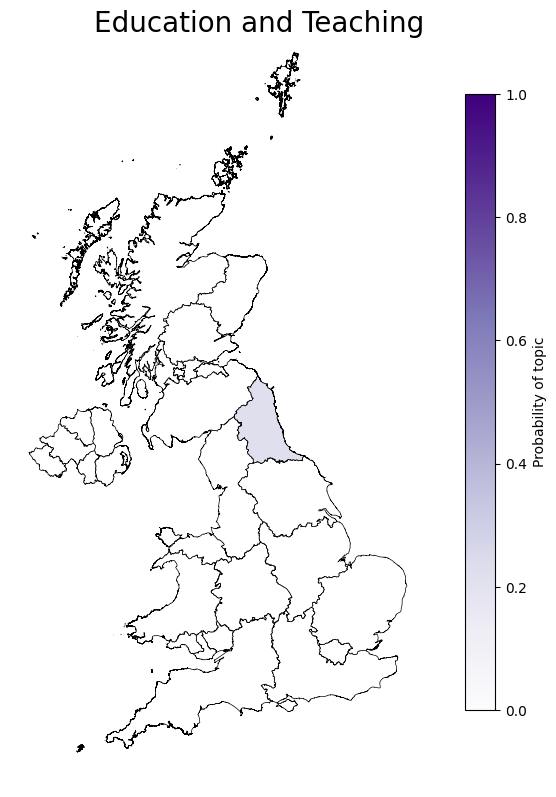

In [460]:
regional_topic_map(regional_topics_geo, 2, "Purples")

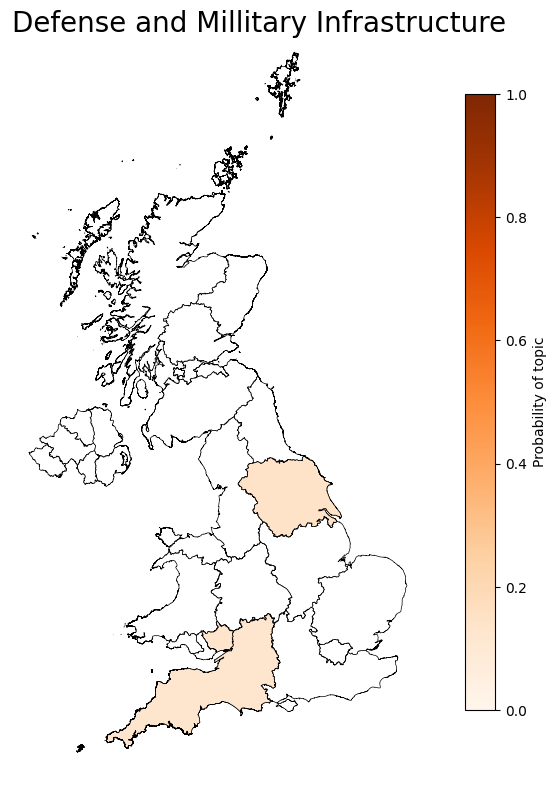

In [276]:
regional_topic_map(regional_topics_geo, 3, "Oranges")

In [435]:
# all questions from the north east that contain the word "school"
questions.loc[(questions["text"].str.lower().str.contains("school")) & (questions["region"] == "North East English Region")]["person"].value_counts()


person
https://id.parliament.uk/oExMNqFA    307
https://id.parliament.uk/dLAjawUW     11
https://id.parliament.uk/qIX4GPzy     10
https://id.parliament.uk/rjeu8U8r      7
https://id.parliament.uk/jyzpZkmk      5
https://id.parliament.uk/bvZikDbO      4
https://id.parliament.uk/58M5vYO7      3
https://id.parliament.uk/v8bLXw0p      2
https://id.parliament.uk/R3dBXlvo      2
https://id.parliament.uk/sRdSNehf      2
https://id.parliament.uk/3u5bZA7Z      1
Name: count, dtype: int64

In [440]:
# all questions from the north east that contain the word "school"

questions.loc[(questions["text"].str.lower().str.contains("defence")) & (questions["region"] == "Yorkshire and the Humber English Region")]["person"].value_counts()

person
https://id.parliament.uk/9VjJ9Mfg    1189
https://id.parliament.uk/X4L826oY      33
https://id.parliament.uk/UGk5lMha      20
https://id.parliament.uk/eCwlzosN       6
https://id.parliament.uk/rbKJTCFu       5
https://id.parliament.uk/JWTvVi0a       2
https://id.parliament.uk/A7xoNSH8       2
https://id.parliament.uk/rdFmhCC6       2
https://id.parliament.uk/Z4VCWYcs       2
https://id.parliament.uk/2Wur8gYZ       1
https://id.parliament.uk/Mj5nBQyZ       1
https://id.parliament.uk/Ybaaa653       1
https://id.parliament.uk/ZKfx7gc5       1
Name: count, dtype: int64

In [401]:
for i, text in enumerate(texts):
    print((list(corpus.keys())[i], len(text)))

('East Midlands English Region', 18392)
('London English Region', 104907)
('South East English Region', 47968)
('Yorkshire and the Humber English Region', 77444)
('North West English Region', 58114)
('West Midlands English Region', 34235)
('South Wales West PER', 6577)
('Mid and West Wales PER', 5144)
('North East English Region', 34272)
('West Scotland PER', 2646)
('South Wales East PER', 4413)
('Glasgow PER', 10193)
('South West English Region', 25952)
('Eastern English Region', 9957)
('North Wales PER', 2469)
('South Scotland PER', 4491)
('Londonderry', 2591)
('Antrim', 1657)
('Highlands and Islands PER', 3471)
('Central Scotland PER', 4528)
('Lothian PER', 1949)
('North East Scotland PER', 941)
('South Wales Central PER', 2095)
('Down', 8296)
('Mid Scotland and Fife PER', 276)


In [507]:
for i, value in enumerate(corpus.values()):
    count = value.count("steel")
    print(f"{count} times for {list(corpus.keys())[i]}")


0 times for East Midlands English Region
0 times for London English Region
3 times for South East English Region
17 times for Yorkshire and the Humber English Region
87 times for North West English Region
0 times for West Midlands English Region
1 times for South Wales West PER
0 times for Mid and West Wales PER
1 times for North East English Region
0 times for West Scotland PER
1 times for South Wales East PER
0 times for Glasgow PER
0 times for South West English Region
0 times for Eastern English Region
0 times for North Wales PER
0 times for South Scotland PER
0 times for Londonderry
0 times for Antrim
0 times for Highlands and Islands PER
0 times for Central Scotland PER
0 times for Lothian PER
0 times for North East Scotland PER
1 times for South Wales Central PER
0 times for Down
0 times for Mid Scotland and Fife PER


In [506]:
words = lda_model_2.show_topic(topicid=0, topn=10)

for word in words:
    word = word[0]
    print(f"Word: {word}")

    for i, text in enumerate(texts):
        if word in text:
            print((list(corpus.keys())[i], text.count(word)))


    print("\n")

Word: steel
('South East English Region', 3)
('Yorkshire and the Humber English Region', 14)
('North West English Region', 119)
('South Wales West PER', 1)
('North East English Region', 1)
('South Wales East PER', 1)
('South Wales Central PER', 1)


Word: merseysid
('North West English Region', 29)


Word: sefton
('East Midlands English Region', 1)
('North West English Region', 36)


Word: wirral
('North West English Region', 26)


Word: muscular
('North West English Region', 25)


Word: cheshir
('London English Region', 1)
('North West English Region', 32)


Word: helen
('North West English Region', 21)


Word: atrophi
('North West English Region', 21)


Word: liverpool
('London English Region', 2)
('Yorkshire and the Humber English Region', 1)
('North West English Region', 48)
('West Midlands English Region', 1)
('North East English Region', 1)
('Down', 1)


Word: weaver
('North West English Region', 17)


